## Date House Pricing

### În acest exercițiu vom utiliza date de pe site-ul de competiții Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Caracteristici
    
* id - ID unic pentru fiecare casă vândută
* date - Data vânzării
* price - Prețul fiecărei case vândute
* bedrooms - Numărul de dormitoare
* bathrooms - Numărul de băi (.5 înseamnă baie fără duș)
* sqft_living - Suprafața utilă
* sqft_lot - Suprafața terenului
* floors - Număr de etaje
* waterfront - 
* view - O valoare de la 0 la 4 ce reflectă calitatea priveliștii proprietății
* condition - O valoare de la  1 la 5 ce reflectă condiția apartamentului
* grade - O valoare de la  1 la 13, unde 1-3 înseamnă o calitate slabă a construcției și design-ului, 7 reprezintă nivelul mediu pentru construcție și design, iar 11-13 reprezintă o calitate ridicată a construcției și design-ului.
* sqft_above - Suprafața interioară care se află deasupra nivelului solului.
* sqft_basement - Suprafața interioară care se află sub nivelul solului.
* yr_built - Anul construcției casei
* yr_renovated - Anul ultimei renovări
* zipcode - Codul poștal
* lat - Latitudine
* long - Longitudine
* sqft_living15 - Suprafața interioară a celor mai apropiați 15 vecini
* sqft_lot15 - Suprafața loturilor de teren ale celor mai apropiați 15 vecini

#### 1. Importați librăriile pandas, numpy, matplotlib și seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Încărcați setul de date house_price_data.csv

In [2]:
df = pd.read_csv('house_price_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Partea 1 - Analiza datelor

#### 3. Verificați dacă există valori null

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 4. Afișați statisticile descriptive.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#### 5. Vizualizați distribuția coloanei 'Price'

Hint: Utilizați o histogramă sau o histogramă cu o estimare de densitate de probabilitate (KDE). Documentați-vă asupra `seaborn.histplot()`.

<AxesSubplot:xlabel='price', ylabel='Count'>

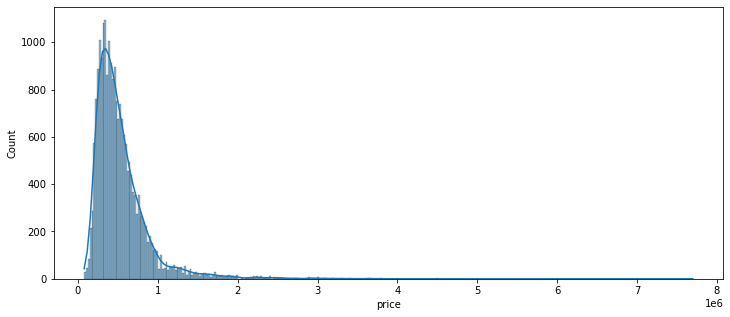

In [5]:
plt.figure(figsize=(12, 5))
sns.histplot(df['price'], kde=True)

#### 6. Vizualizați repartiția numărului de camere din case.


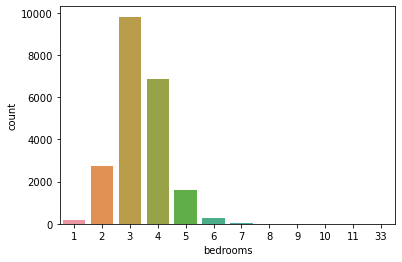

In [6]:
sns.countplot(x=df['bedrooms']);

#### 7. Calculați media prețului caselor grupat după numărul de dormitoare. Vizualizați această informație cu ajutorul unei diagrame de tip barplot.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

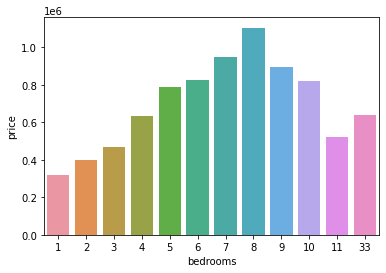

In [7]:
price_per_bedrooms = df.groupby('bedrooms').price.mean()
sns.barplot(x=price_per_bedrooms.index, y=price_per_bedrooms)

## Partea 2 - Pregătirea datelor

#### 8. Suprimați coloana 'id' 

In [8]:
df = df.drop('id',axis=1)
print(df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')



#### 9. Creați 2 coloane 'Year' și 'month' ce conțin, respectiv, anul și luna din coloana 'date'. Apoi, suprimați coloana 'date'.

Hint: Verificați că tipul de date al coloanei date este datetime.

Hint 2: Utilizați metoda `.apply()` combinată cu o lambda funcție adaptată pentru extragerea lunii și anului.

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

In [10]:
df = df.drop('date', axis=1)
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')


#### 10. Trasați 2 grafice de tip boxplot pentru vizualizarea repartiției prețului caselor după an și apoi după lună. Vizualizați valorile prețurilor mai mici decât 2e6

Hint: Utilizați funcția `plt.ylim()`

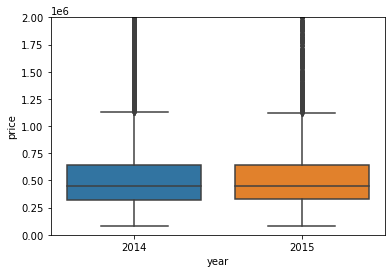

In [11]:
sns.boxplot(x='year', y='price', data=df)
plt.ylim(0, 2e6);

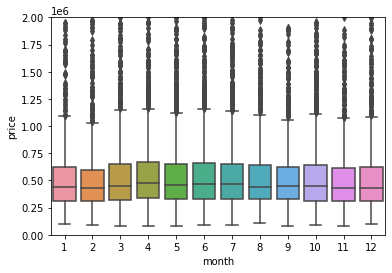

In [12]:
sns.boxplot(x='month', y='price', data=df)
plt.ylim(0, 2e6);

#### 11. Numărați valorile unice de cod poștal. Putem utiliza one-hot encoder pentru a encoda această  valoare? Câte coloane noi ar fi create? 

In [13]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
df['zipcode'].nunique()

70

#### 12. Pentru a simplifica, suprimați coloana 'zipcode'

In [14]:
df = df.drop('zipcode',axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

#### 13. Afișați primele rânduri din dataset

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


#### 14. Separați caracteristicile variabilei țintă (X et y), apoi divizați coloanele în Train și Test

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### 15. Deoarece toate coloanele sunt numerice, aplicați-le un feature scaling.

Observație: Trebuie ca scaler-ul să învețe doar pe datele de antrenament și să fie aplicat pe datele de antrenament și de test.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 16. Afișați forma dataset-urilor de antrenament și de test

In [18]:
print(X_train.shape)
print(X_test.shape)

(15117, 19)
(6480, 19)


## Partea 3 - Modelare

#### 17. Importați clasele Sequential și Dense

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 18. Creați o rețea de neuroni cu o arhitetcură adaptată problemei de regresie. Afișați sumarul.

In [20]:
model = Sequential()
model.add(Dense(19, activation='relu', input_shape=(19, )))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


#### 19. Compilați modelul

Hint: Acordați atenție parametrilor de pe ultimul strat. Avem o problemă de regresie, nu de clasificare.

In [21]:
model.compile(optimizer='adam', loss='mse')

#### 20. Antrenați modelul pentru 200 de epoci și o dimensiune rezonabilă a batch-ului. Recuperați rezultatul într-o variabilă history.

In [22]:
history = model.fit(x=X_train,
                  y=y_train,
                  validation_data=(X_test, y_test),
                  batch_size=128, 
                  epochs=200)

Epoch 1/200
119/119 [==============================] - 3s 16ms/step - loss: 418031122295.4667 - val_loss: 418892546048.0000
Epoch 2/200
119/119 [==============================] - 0s 1ms/step - loss: 417641644578.1334 - val_loss: 414696898560.0000
Epoch 3/200
119/119 [==============================] - 0s 1ms/step - loss: 424722990967.4667 - val_loss: 377893421056.0000
Epoch 4/200
119/119 [==============================] - 0s 1ms/step - loss: 360635886250.6667 - val_loss: 254189404160.0000
Epoch 5/200
119/119 [==============================] - 0s 1ms/step - loss: 222628564582.4000 - val_loss: 116475035648.0000
Epoch 6/200
119/119 [==============================] - 0s 1ms/step - loss: 116372313565.8667 - val_loss: 94817337344.0000
Epoch 7/200
119/119 [==============================] - 0s 1ms/step - loss: 101012292881.0667 - val_loss: 93263839232.0000
Epoch 8/200
119/119 [==============================] - 0s 1ms/step - loss: 93933397401.6000 - val_loss: 91701444608.0000
Epoch 9/200
119/119

#### 21. Vizualizați evoluția training loss și validation loss

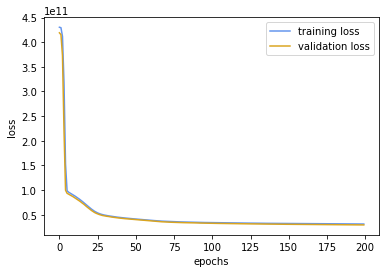

In [46]:
plt.plot(history.history['loss'], c='cornflowerblue', label='training loss')
plt.plot(history.history['val_loss'], c='goldenrod', label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss');

#### 22. Evaluați modelul după 3 metrici diferite: RMSE (root mean squared error), MAE (mean absolute error) și MSLE (mean squared log error). Afișați cele 3.

Hint: Explorați documentația submodulului sklearn.metrics

Hint 2: Calculați mai întâi predicția pe mulțimea de test.

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

y_pred = model.predict(X_test).reshape((-1, ))

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = mean_squared_log_error(y_test, y_pred)

print(f'RMSE: {rmse} - MAE: {mae} - MSLE: {msle}')

RMSE: 172916.97320886262 - MAE: 106864.58544138214 - MSLE: 0.06657623743259825


#### 23. Calculați media și mediana prețului caselor

In [57]:
print(f"Mean price: {df['price'].mean()} - Median Price: {df['price'].median()}")

Mean price: 540296.5735055795 - Median Price: 450000.0


#### 24. Trasați un scatterplot al predicțiilor în funcție de valorile reale ale variabilei țintă (price). Apoi, adăugați dreapta ce reprezintă predicțiile perfecte (y = x). Ce remarcați?

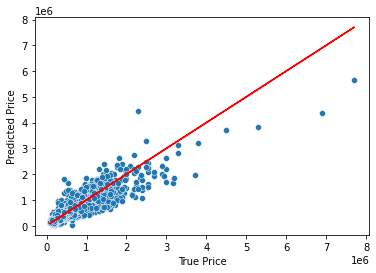

In [24]:
# Our predictions
sns.scatterplot(x=y_test, y=y_pred)

# Perfect predictions
plt.plot(y_test, y_test, 'r')

plt.xlabel('True Price')
plt.ylabel('Predicted Price');

#### 25. Calculați vectorul de valori reziduale (valori reale - predicții). Apoi, trasați o histogramă cu estimarea densității acestor erori.

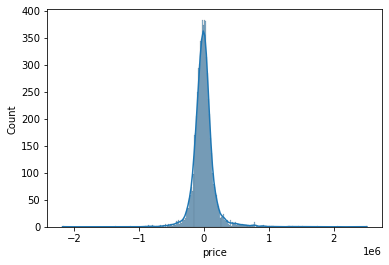

In [25]:
errors = y_test - y_pred
sns.histplot(x=errors, kde=True);

-------------